## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [12]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [24]:
# 把兩個訓練資料集和測試資料集讀進來

df_Titanic_train = pd.read_csv('Titanic_train.csv')
df_Titanic_test = pd.read_csv('Titanic_test.csv')

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [25]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
df_Titanic_train.info()
print()
df_Titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass 

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [28]:
#可以嘗試用範例的程式

df_Titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [35]:
#合併資料
df_Titanic_new = pd.concat([df_Titanic_test, df_Titanic_train])
print(df_Titanic_new.head(5))

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q       NaN  
1  47.0      1      0   363272   7.0000   NaN        S       NaN  
2  62.0      0      0   240276   9.6875   NaN        Q       NaN  
3  27.0      0      0   315154   8.6625   NaN        S       NaN  
4  22.0      1      1  3101298  12.2875   NaN        S       NaN  


In [46]:
# 以 XXX 為例，先看 Cabin  出現值的特性

print(df_Titanic_new["Cabin"].value_counts())

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
B96 B98            4
                  ..
B94                1
F E69              1
A23                1
F E46              1
C28                1
Name: Cabin, Length: 186, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


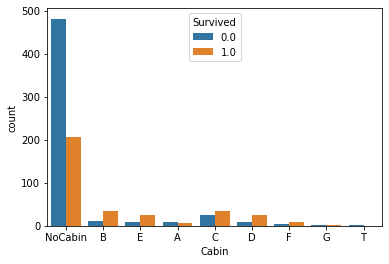

In [57]:
df_Titanic_new['Cabin'] = df_Titanic_new['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
df_Titanic_new["Cabin"].unique()
sns.countplot(df_Titanic_new['Cabin'], hue=df_Titanic_new['Survived'])